In [3]:
import numpy as np

def scale_point(point, sx, sy, sz):
    # Add the 1 for homogeneous coordinates
    vec = np.array([point[0], point[1], point[2], 1])
    scale_mat = np.array([
        [sx, 0, 0, 0],
        [0, sy, 0, 0],
        [0, 0, sz, 0],
        [0, 0, 0, 1]
    ])
    result = scale_mat @ vec
    return result[:3]

# Example use
a = scale_point((2, 3, 4), 2, 0.5, 1.5)
print(a)


[4.  1.5 6. ]


In [4]:
def rot_x(deg):
    rad = np.radians(deg)
    c, s = np.cos(rad), np.sin(rad)
    return np.array([
        [1, 0, 0, 0],
        [0, c, -s, 0],
        [0, s,  c, 0],
        [0, 0, 0, 1]
    ])

def rot_y(deg):
    rad = np.radians(deg)
    c, s = np.cos(rad), np.sin(rad)
    return np.array([
        [c, 0, s, 0],
        [0, 1, 0, 0],
        [-s, 0, c, 0],
        [0, 0, 0, 1]
    ])

def rot_z(deg):
    rad = np.radians(deg)
    c, s = np.cos(rad), np.sin(rad)
    return np.array([
        [c, -s, 0, 0],
        [s,  c, 0, 0],
        [0,  0, 1, 0],
        [0,  0, 0, 1]
    ])

def rotate_point(point, rx, ry, rz):
    vec = np.array([point[0], point[1], point[2], 1])
    # Sequential rotation: Rz * Ry * Rx
    mat = rot_z(rz) @ rot_y(ry) @ rot_x(rx)
    result = mat @ vec
    return result[:3]

# Example use
p = rotate_point((1, 1, 1), 45, 30, 60)
print(p)


[0.78656609 1.36237244 0.72474487]


In [5]:
def translate(tx, ty, tz):
    mat = np.eye(4)
    mat[:3, 3] = [tx, ty, tz]
    return mat

# Cube vertices
def cube_vertices():
    # Each (x, y, z) for a 2x2x2 cube centered at origin
    return np.array([
        [1, 1, 1], [-1, 1, 1], [-1, -1, 1], [1, -1, 1],
        [1, 1, -1], [-1, 1, -1], [-1, -1, -1], [1, -1, -1]
    ])


def transform_vertices(vertices, mat):
    transformed = []
    for v in vertices:
        vec = np.append(v, 1)
        new_v = mat @ vec
        transformed.append(new_v[:3])
    return np.array(transformed)

# Compose transformations
cube = cube_vertices()
scaling = np.diag([1.5, 0.5, 1, 1])
rotation = rot_z(45) @ rot_y(30) @ rot_x(20)
translation = translate(2, 1, 3)
combo = translation @ rotation @ scaling
cube_transformed = transform_vertices(cube, combo)

print("Original vertices:\n", cube)
print("Transformed vertices:\n", cube_transformed)


Original vertices:
 [[ 1  1  1]
 [-1  1  1]
 [-1 -1  1]
 [ 1 -1  1]
 [ 1  1 -1]
 [-1  1 -1]
 [-1 -1 -1]
 [ 1 -1 -1]]
Transformed vertices:
 [[ 3.22086461  2.40163811  3.21189675]
 [ 1.3837473   0.5645208   4.71189675]
 [ 1.92728794 -0.22086461  4.41569861]
 [ 3.76440525  1.6162527   2.91569861]
 [ 2.07271206  2.22086461  1.58430139]
 [ 0.23559475  0.3837473   3.08430139]
 [ 0.77913539 -0.40163811  2.78810325]
 [ 2.6162527   1.4354792   1.28810325]]


In [6]:
def reflect_xy(vertices):
    mat = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, -1, 0],
        [0, 0, 0, 1]
    ])
    return transform_vertices(vertices, mat)

# Reflect cube
cube_reflected = reflect_xy(cube)
print("Reflected cube vertices:\n", cube_reflected)


Reflected cube vertices:
 [[ 1  1 -1]
 [-1  1 -1]
 [-1 -1 -1]
 [ 1 -1 -1]
 [ 1  1  1]
 [-1  1  1]
 [-1 -1  1]
 [ 1 -1  1]]


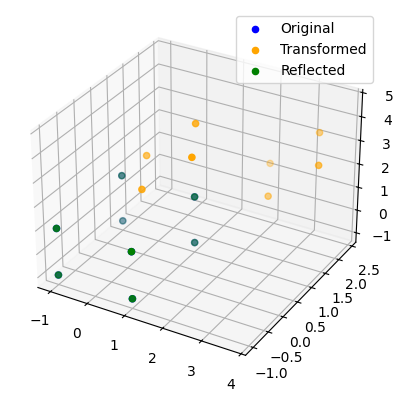

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot original cube (blue)
cube = cube_vertices()
ax.scatter(cube[:,0], cube[:,1], cube[:,2], color='blue', label='Original')

# Plot transformed cube (orange)
cube_transformed = transform_vertices(cube, combo)
ax.scatter(cube_transformed[:,0], cube_transformed[:,1], cube_transformed[:,2], color='orange', label='Transformed')

# Plot reflected cube (green)
cube_reflected = reflect_xy(cube)
ax.scatter(cube_reflected[:,0], cube_reflected[:,1], cube_reflected[:,2], color='green', label='Reflected')

ax.legend()
plt.show()


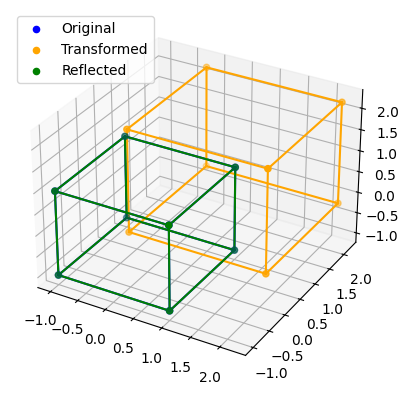

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def cube_vertices():
    return np.array([
        [1, 1, 1], [-1, 1, 1], [-1, -1, 1], [1, -1, 1],
        [1, 1, -1], [-1, 1, -1], [-1, -1, -1], [1, -1, -1]
    ])

# Edges of a cube (pairs of vertex indices)
cube_edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # Top face
    (4, 5), (5, 6), (6, 7), (7, 4),  # Bottom face
    (0, 4), (1, 5), (2, 6), (3, 7)   # Vertical edges
]

def plot_cube(vertices, color, ax, label=None):
    # Plot points
    ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], color=color, label=label)
    # Draw edges
    for edge in cube_edges:
        x = [vertices[edge[0], 0], vertices[edge[1], 0]]
        y = [vertices[edge[0], 1], vertices[edge[1], 1]]
        z = [vertices[edge[0], 2], vertices[edge[1], 2]]
        ax.plot(x, y, z, color=color)

# Example transformation (identity for original)
cube = cube_vertices()
# Here, substitute with real transform for transformed/reflected cubes
cube_transformed = cube * 1.2 + np.array([1,1,1])
cube_reflected = cube * np.array([1,1,-1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plot_cube(cube, 'blue', ax, 'Original')
plot_cube(cube_transformed, 'orange', ax, 'Transformed')
plot_cube(cube_reflected, 'green', ax, 'Reflected')

ax.legend()
plt.show()
